# Building Python Packages with Pip
Short tutorial on how to build you own installable Pip package.

In [1]:
#get dummy project code
!git clone https://github.com/keuperj/pip_example.git

Cloning into 'pip_example'...
remote: Enumerating objects: 24, done.
remote: Total 24 (delta 0), reused 0 (delta 0), pack-reused 24
Unpacking objects: 100% (24/24), 7.62 KiB | 974.00 KiB/s, done.


In [18]:
#go to project folder and have a look at the files
# %cd is important! -> switch working directory for all cells in this notebook
%cd pip_example

[Errno 2] No such file or directory: 'pip_example'
/content/pip_example


In [15]:
!ls -R


.:
docs  LICENSE  pyexample  README.rst  setup.py

./docs:
conf.py  index.rst  Makefile  mpi4py_module.rst  readme.rst

./pyexample:
__init__.py  module_mpi4py_1.py  module_numpy_1.py  module_numpy_2.py


The files should look like this, where the actual python code is in the folder `pyexample`


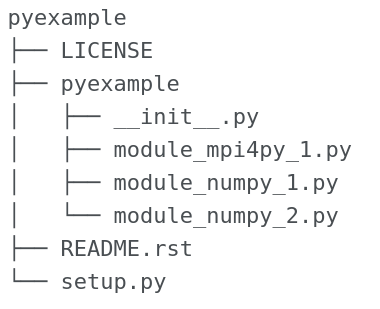

In [10]:
#now we need to install some tools
!pip install setuptools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Package Configuration
The main thing we nedd to do, is to provide a setup file...

For Details see: https://setuptools.readthedocs.io/en/latest/setuptools.html#command-reference

In [16]:
%%writefile setup.py

from setuptools import setup

setup(
    name='pyexample',
    version='0.1.0',    
    description='A example Python package',
    url='https://github.com/shuds13/pyexample',
    author='YOUR NAME',
    author_email='YOUR.EMAIL@SERVER.COM',    
    license='BSD 2-clause',
    packages=['pyexample'],
    install_requires=['mpi4py>=2.0',
                      'numpy',
                      ],

    classifiers=[
        'Development Status :: 1 - Planning',
        'Intended Audience :: Science/Research',
        'License :: OSI Approved :: BSD License',  
        'Operating System :: POSIX :: Linux',        
        'Programming Language :: Python :: 2',
        'Programming Language :: Python :: 2.7',
        'Programming Language :: Python :: 3',
        'Programming Language :: Python :: 3.4',
        'Programming Language :: Python :: 3.5',
    ],
)    

Overwriting setup.py


In [17]:
#now build the package!
!pip install .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/pip_example
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 32.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyexample: filename=pyexample-0.1.0-py3-none-any.whl size=5288 sha256=9e85eac10140b5cc08a77e046847b72ece2b9d6f6229418644779e37c1c7f46e
  Stored in directory: /tmp/pip-ephem-wheel-cache-0hz1cd9y/wheels/87/a2/44/0b2e5d0bc7870e975d048f5a3864d22cfbb35a3b47f59b0e19
  Created wheel for mpi4py: filename=mpi4py-3.1.4-cp39-cp39-linux_x86_64.whl size=3380645 sha256=3da9a6bad580bd768c960dad52b8561aa0827a482e2793107b7d35e75f084545
  Stored in directory: /root/.cache/pip/wheels/db/81/9f/43a031fce121c845baca1c5d9a1468cad98208286aa2832de9
Successfully built pyexample mpi4py


Our Package is now locally available:

In [22]:
!pip list |grep pyexample

pyexample                     0.1.0


### Build Source Distribution

In [19]:
!python setup.py check


running check


In [23]:
!python setup.py sdist


running sdist
running egg_info
writing pyexample.egg-info/PKG-INFO
writing dependency_links to pyexample.egg-info/dependency_links.txt
writing requirements to pyexample.egg-info/requires.txt
writing top-level names to pyexample.egg-info/top_level.txt
reading manifest file 'pyexample.egg-info/SOURCES.txt'
adding license file 'LICENSE'
writing manifest file 'pyexample.egg-info/SOURCES.txt'
running check
creating pyexample-0.1.0
creating pyexample-0.1.0/pyexample
creating pyexample-0.1.0/pyexample.egg-info
copying files to pyexample-0.1.0...
copying LICENSE -> pyexample-0.1.0
copying README.rst -> pyexample-0.1.0
copying setup.py -> pyexample-0.1.0
copying pyexample/__init__.py -> pyexample-0.1.0/pyexample
copying pyexample/module_mpi4py_1.py -> pyexample-0.1.0/pyexample
copying pyexample/module_numpy_1.py -> pyexample-0.1.0/pyexample
copying pyexample/module_numpy_2.py -> pyexample-0.1.0/pyexample
copying pyexample.egg-info/PKG-INFO -> pyexample-0.1.0/pyexample.egg-info
copying pyexample

In [24]:
#now we get a tar file with the source code
!ls dist

pyexample-0.1.0.tar.gz


### Publishing our Package

See https://pypi.python.org/pypi

In [25]:
#we need another tool for that:
!pip install twine


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 5.5 MB/s eta 0:00:00


In [27]:
#now upload our package to PyPy 
#
#of cause this will require an account!
# -> no need to actually do this with this dummy code
# -> but if you do this for real (and package name is not taken), 
# you could do a "pip install pyexample" on every system 
!twine upload dist/*

Uploading distributions to https://upload.pypi.org/legacy/
Enter your username: Traceback (most recent call last):
  File "/usr/local/bin/twine", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.9/dist-packages/twine/__main__.py", line 33, in main
    error = cli.dispatch(sys.argv[1:])
  File "/usr/local/lib/python3.9/dist-packages/twine/cli.py", line 123, in dispatch
    return main(args.args)
  File "/usr/local/lib/python3.9/dist-packages/twine/commands/upload.py", line 198, in main
    return upload(upload_settings, parsed_args.dists)
  File "/usr/local/lib/python3.9/dist-packages/twine/commands/upload.py", line 127, in upload
    repository = upload_settings.create_repository()
  File "/usr/local/lib/python3.9/dist-packages/twine/settings.py", line 329, in create_repository
    self.username,
  File "/usr/local/lib/python3.9/dist-packages/twine/settings.py", line 131, in username
    return cast(Optional[str], self.auth.username)
  File "/usr/local/lib/python